# **Link Dashboard**

https://public.tableau.com/views/HRAnalyticsDashboard-AgusSusanto-M1/Dashboard2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# **Perkenalan**

Nama      : Agus Susanto

Batch     : RMT-26

Objective : Melakukan analisis penyebab karyawan melakukan pengunduran diri pada sebuah perusahaan, sehingga perusahaan dapat membuat kebijakan sesuai dengan hasil analisis berdasarkan data

# **Identifikasi Masalah**

**SMART framework** :

**Specific**      : Mengurangi persentase Attrition perusahaan

**Measurable**    : Persentase Attrition berkurang menjadi < 10%

**Achievable**    : Meningkatkan rate gaji, kualitas lingkungan kerja, training waktu dan juga memperhatikan work life balance karyawan

**Relevant**      : Menurunkan persentasi Attrition perusahaan akan mempengaruhi lancarnya pekerjaan dan project perusahaan sehingga dapat membuat revenue menjadi naik

**Time-Bound**: Akan di lihat sampai 6 bulan berikutnya

**Problem statemen**t:

Mengurangi persentasi attrition perusahaan sampai sebesar < 10% dalam 6 bulan berikutnya. Hal ini akan di capai dengan meningkatkan gaji, kualitas lingkungan kerja, training waktu dan juga memperhatikan work life balance karyawan sehingga dapat meningkatkan produktifitas dan revenue perusahaan

**Penjabaran masalah dengan metode 5W+1H:**

1. Berapa total attrition rate saat ini?

2. Apakah karyawan yang melakukan lembur akan cenderung mengundurkan diri?

3. Apakah job satisfication rendah mempengaruhi karyawan mengundurkan diri?

4. Departemen mana yang mempunyai attrition rate terbesar?

5. Bagaimana persebaran attrition rate berdasarkan job level?

6. Pada tahun keberapa karyawan cenderung mengundurkan diri?

7. Apakah ada pengaruh terhadap persentasi kenaikan gaji dengan attration karyawan?

8. Berapa range penghasilan bulanan dari karyawan yang mengundurkan diri?

# **Data Loading**

In [ ]:
#Import Semua Library yang di pakai

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## **Sumber Data**

Dataset pada analisis ini di ambil dari website kaggle dengan link berikut :

https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction

In [ ]:
#Membaca data dari csv
data_attr = pd.read_csv('/content/drive/MyDrive/DATA PENTING PRIBADI/Hacktiv/Milestone Phase 0/HR-Employee-Attrition.csv')

#Menampilkan data
data_attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Data Cleaning**

## **Handling Null Value**

In [ ]:
#Menampilkan info dataframe
data_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### **Knowledge**

Tidak ditemukan adanya data null dan type data sudah sesuai

## **Handling Data Duplicate**

In [ ]:
#Melakukan pengechekan data duplicate

data_attr.duplicated().sum()

0

### **Knowledge**

Tidak di temukan adanya data duplicate

## **Handling kolom yang tidak di butuhkan**

In [ ]:
#Menampilkan dataframe
data_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### **Insight**

Berdasarkan data di atas ada banyak kolom yang tidak akan di pakai dalam analisis ini sehingga akan di hapus

In [ ]:
#List Column
column = ['BusinessTravel','DistanceFromHome','Education','EducationField','EmployeeCount','EnvironmentSatisfaction','JobInvolvement','HourlyRate','DailyRate','StandardHours','MonthlyRate','NumCompaniesWorked','Over18','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','YearsWithCurrManager']


#Looping untuk menghapus kolom yang tidak di butuhkan
for i in column:
  data_attr = data_attr.drop(i, axis='columns')

#Menampilkan data
data_attr


,Age,Attrition,Department,EmployeeNumber,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Sales,1,Female,2,Sales Executive,4,Single,5993,Yes,11,3,0,1,6,4,0
1,49,No,Research & Development,2,Male,2,Research Scientist,2,Married,5130,No,23,4,3,3,10,7,1
2,37,Yes,Research & Development,4,Male,1,Laboratory Technician,3,Single,2090,Yes,15,3,3,3,0,0,0
3,33,No,Research & Development,5,Female,1,Research Scientist,3,Married,2909,Yes,11,3,3,3,8,7,3
4,27,No,Research & Development,7,Male,1,Laboratory Technician,2,Married,3468,No,12,3,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2061,Male,2,Laboratory Technician,4,Married,2571,No,17,3,3,3,5,2,0
1466,39,No,Research & Development,2062,Male,3,Healthcare Representative,1,Married,9991,No,15,3,5,3,7,7,1
1467,27,No,Research & Development,2064,Male,2,Manufacturing Director,2,Married,6142,Yes,20,4,0,3,6,2,0
1468,49,No,Sales,2065,Male,2,Sales Executive,2,Married,5390,No,14,3,3,2,9,6,0


## **Data Final**

In [ ]:
#Menyimpan data ke csv
data_attr.to_csv('data_attr_cleaned.csv', index=False)

# **Analisis dan perhitungan**



In [ ]:
# Membaca data dari csv
data_final = pd.read_csv('data_attr_cleaned.csv')
data_final.head()

,Age,Attrition,Department,EmployeeNumber,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Sales,1,Female,2,Sales Executive,4,Single,5993,Yes,11,3,0,1,6,4,0
1,49,No,Research & Development,2,Male,2,Research Scientist,2,Married,5130,No,23,4,3,3,10,7,1
2,37,Yes,Research & Development,4,Male,1,Laboratory Technician,3,Single,2090,Yes,15,3,3,3,0,0,0
3,33,No,Research & Development,5,Female,1,Research Scientist,3,Married,2909,Yes,11,3,3,3,8,7,3
4,27,No,Research & Development,7,Male,1,Laboratory Technician,2,Married,3468,No,12,3,3,3,2,2,2


## **Berapa total attrition rate saat ini?**

### **Grafik**

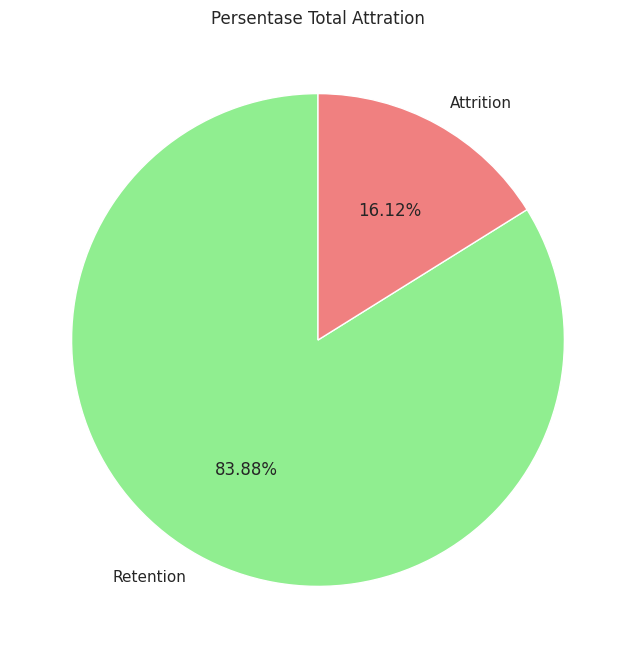

In [174]:
#Menghitung total value
Attrition_Rate = data_final['Attrition'].value_counts()

#Menentukan ukuran chart
plt.figure(figsize=(8, 8))

# Membuat pie chart
plt.pie(Attrition_Rate, labels=['Retention', 'Attrition'], autopct='%1.2f%%', startangle=90, colors=['lightgreen', 'lightcoral'])

#Mengubah nama chart
plt.title('Persentase Total Attration')

#Menampilkan chart
plt.show()

### **Knowledge**
Dapat di ambil kesimpulan bahwa pesentase attrition adalah sebesar **16.12%**

## **Apakah karyawan yang melakukan lembur akan cenderung mengundurkan diri?**

### **Hipotesis**

H0 : Karyawan yang melakukan lembur cenderung tidak kan resign

H1 : Karyawan yang melakukan lembur cenderung akan resign

In [176]:
#Contingency Table
contingency_table = pd.crosstab(data_final['OverTime'],data_final['Attrition'])
contingency_table

Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


In [177]:
#Menghitung P-Value
res = stats.chi2_contingency(contingency_table)

#Menampilkan P-Value
print("P-value          : ", res.pvalue)

#Critical Value
critvalue = 0.05

#Menampilkan Critical Value
print("Critical Value   : ", critvalue)

#Condition menentukan hasil hipotesis
if res.pvalue < critvalue:
    print(f'P-Value < Critical Value, sehingga H0 ditolak')
else:
    print(f'P-Value > Critical Value, sehingga H0 diterima')

P-value          :  8.15842372153832e-21
Critical Value   :  0.05
P-Value < Critical Value, sehingga H0 ditolak


### **Insight**

Berdasarkan pengujian hipotesa, karyawan yang melakukan lembur cenderung akan mengajukan resign. Jika di lihat pada data bahwa karyawan yang overtime cendrung lebih banyak yang mengajukan resign dari pada yang tidak overtime.
Sehingga perusahaan atau departemen terkait perlu untuk memperhatikan assignment lembur kepada team nya, bisa melalui pembagian yang merata atau mengatur pekerjaan lebih baik lagi

## **Apakah job satisfication rendah mempengaruhi karyawan mengundurkan diri?**

In [ ]:
#Copy dataframe ke dataframe baru
data_temp = data_final.copy()

#Mengubah nilai attration menjadi 1 dan 0 agar bisa di hitung
data_temp['Attrition'] = data_temp['Attrition'].replace({'Yes':1,'No':0})

#Menampilkan Data
data_temp['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [ ]:
#Menampilkan data dengan grouping
data_temp.groupby('JobSatisfaction')[['Attrition']].mean().reset_index()

,JobSatisfaction,Attrition
0,1,0.228374
1,2,0.164286
2,3,0.165158
3,4,0.113290


Dari data dapat di lihat bahwa semakin rendah job satisfication membuat nilai attrition menjadi lebih tinggi. Sehingga semakin rendah nilai job satisfication akan mempengaruhi karyawan mengundurkan diri, selanjutnya kita akan membuat hipotesis :

#### **Hipotesis**

**H0** : Job Satisfication mempengaruhi keputusan pengunduran diri karyawan

**H1** : Job Satisfication tidak mempengaruhi keputusan pengunduran diri karyawan

In [ ]:
#Memfilter dataframe
tmp = data_temp.groupby('JobSatisfaction')[['Attrition']].mean().reset_index()

#Menghitung kendaltau dan pvalue
tau, pval = stats.kendalltau(tmp['JobSatisfaction'],tmp['Attrition'])
print('Kendall Tau:',tau)

#Menampilkan P-Value
print("P-value          : ", pval)

#Critical Value
critvalue = 0.05

#Menampilkan Critical Value
print("Critical Value   : ", critvalue)

#Condition menentukan hasil hipotesis
if pval < critvalue:
    print(f'P-Value < Critical Value, sehingga H0 ditolak')
else:
    print(f'P-Value > Critical Value, sehingga H0 diterima')

Kendall Tau: -0.6666666666666669
P-value          :  0.3333333333333333
Critical Value   :  0.05
P-Value < Critical Value, sehingga H0 diterima


### **Insight**

Berdasarkan uji hipotesa H0 diterima, sehingga dapat di ambil kesimpulan bahwa job satisfaction mempengaruhi karyawan mengundurkan diri, hal ini juga di dukung dengan grafik berikut bahwa karyawan yang mengundurkan diri rata-rata memiliki job satisfication yang rendah sekitar pada range 1-2, sehingga perusahaan perlu melakukan beberapa kebijakan untuk menaikan job satisfaction ini.

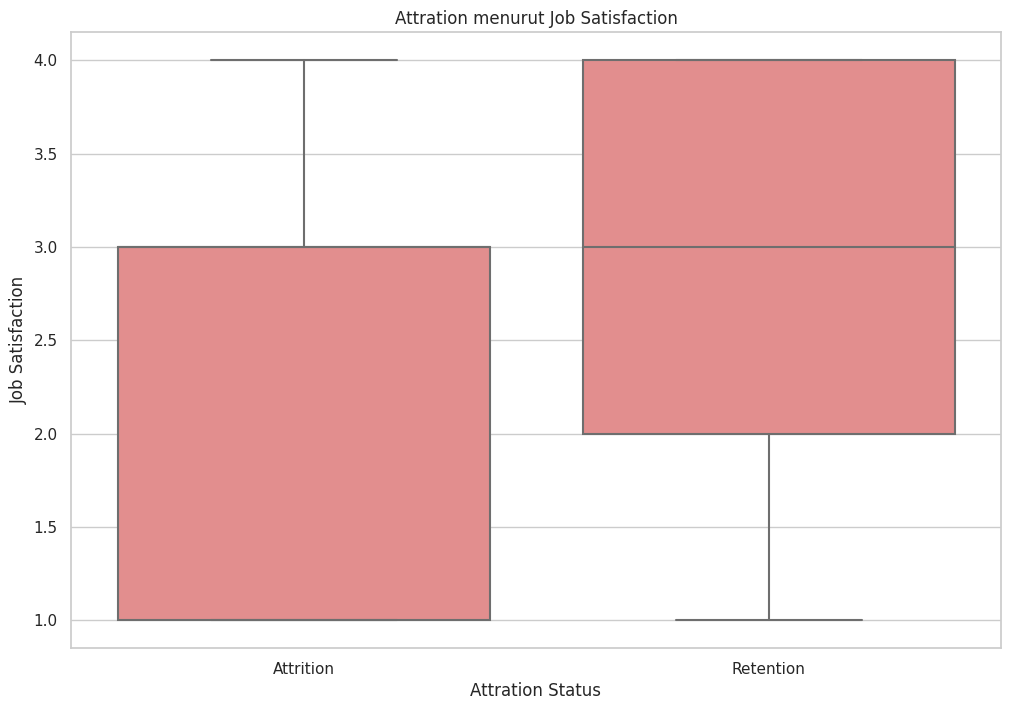

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan ukuran chart
plt.figure(figsize=(12, 8))

#Membuat chart, warna dan data nya
sns.boxplot(x="Attrition", y="JobSatisfaction", data=data_final, palette={"No": "lightcoral", "Yes": "lightcoral"})

# menentukan nama axis x dan axis y
plt.xlabel("Attration Status")
plt.ylabel("Job Satisfaction")

#Menambah title chart
plt.title("Attration menurut Job Satisfaction")

#Menambah nama value dalam chart
plt.xticks([0, 1], ["Attrition", "Retention"])

# Menampilkan chart
plt.show()

## **Departemen mana yang mempunyai attrition rate terbesar?**

### **Grafik**

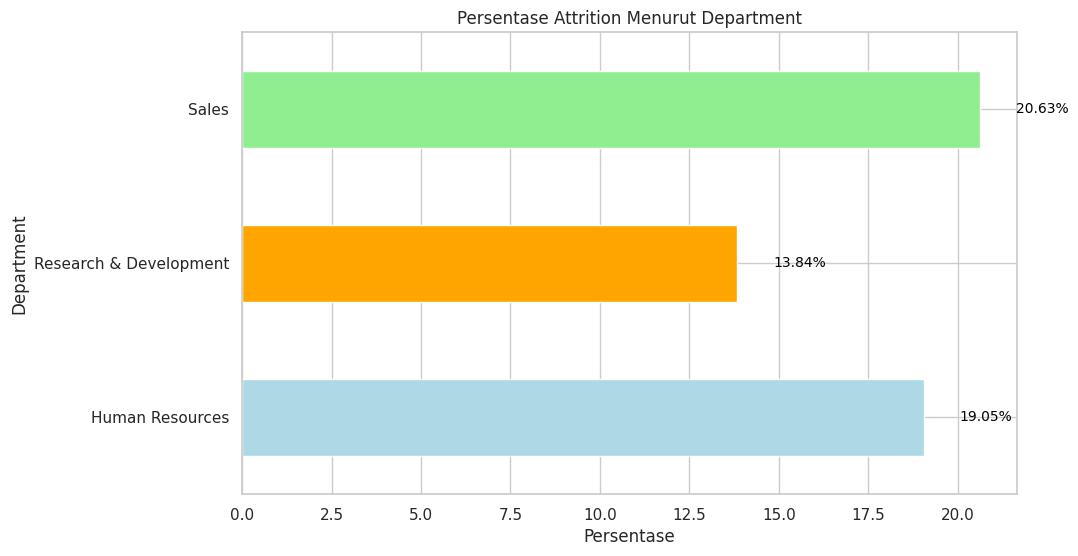

In [180]:
# Menghitung persentase attrition menurut departement
attr_prst = (data_final.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)).round(2)

#Jika nilai kosong maka akan di isi 0
attr_prst = attr_prst.fillna(0)

#Membuat chart
fig, ax = plt.subplots(figsize=(10, 6))

#Custom warna dari setiap value
colors = ['lightblue', 'orange', 'lightgreen']

#Membuat chart menjadi horisontal
attr_prst.plot(kind='barh', color=colors, ax=ax)

# menambah data label
for i, v in enumerate(attr_prst):
    ax.text(v + 1, i, f'{v}%', ha='left', va='center', fontsize=10, color='black')

#Menentukan nama axis x
ax.set_xlabel('Persentase')

#Menentukan nama chart
ax.set_title('Persentase Attrition Menurut Department')

# Menampilkan chart
plt.show()

### **Knowledge**

Berdasarkan data di dapatkan kesimpulan bahwa Sales mempunyai persentase attrition by departement tertinggi dengan 20.6%, di susul Human Resources dan Researc & Development

## **Bagaimana persebaran attrition rate berdasarkan job level?**

### **Grafik**

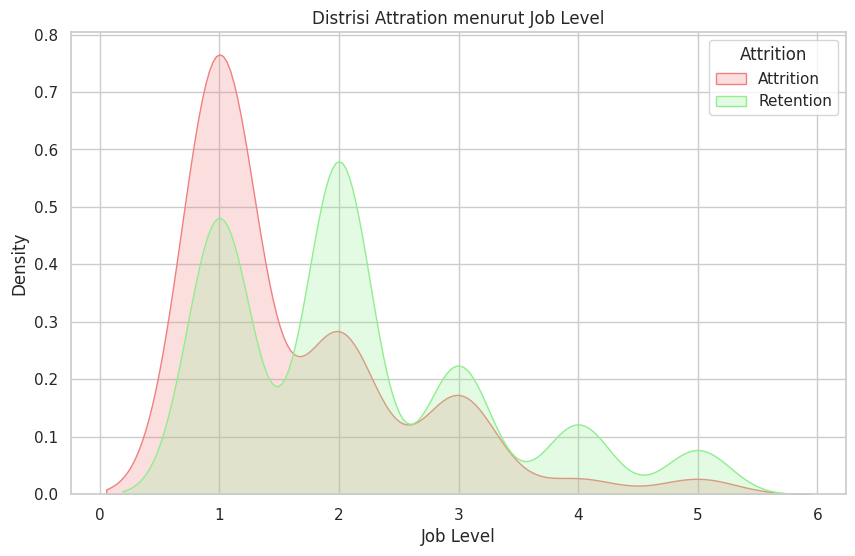

In [181]:
#Membuat list attrition dengan value yes
attrition_yes = data_final[data_final['Attrition'] == 'Yes']

#Membuat list attrition dengan value no
attrition_no = data_final[data_final['Attrition'] == 'No']

# Set style dari seaborn
sns.set(style="whitegrid")

# Membuat chart plot untuk attrition yes
plt.figure(figsize=(10, 6))
sns.kdeplot(data=attrition_yes['JobLevel'], label='Attrition: Yes', color='lightcoral', fill=True)

# Membuat chart plot untuk attrition no
sns.kdeplot(data=attrition_no['JobLevel'], label='Attrition: No', color='lightgreen', fill=True)

# menentukan nama chart
plt.title('Distrisi Attration menurut Job Level')

#Menentukan nama axis x
plt.xlabel('Job Level')
#Menentukan nama axis y
plt.ylabel('Density')
#Mengubah label value
plt.legend(title='Attrition', labels=['Attrition', 'Retention'])

#Menampilkan chart
plt.show()

### **Insight**

Berdasarkan analisis Job Level dengan attrition, di temukan bahwa job level 1 dan 2 adalah job level dengan persentase attrition tertinggi, yang berarti bahwa pada level ini karyawan cenderung paling banyak mengajukan resign.
Sehingga perusahaan perlu lebih memperhatikan karyawan dengan level 1-2 dengan membuat kebijakan-kebijakan yang sesuai

## **Pada tahun keberapa karyawan cenderung mengundurkan diri?**

### **Grafik**

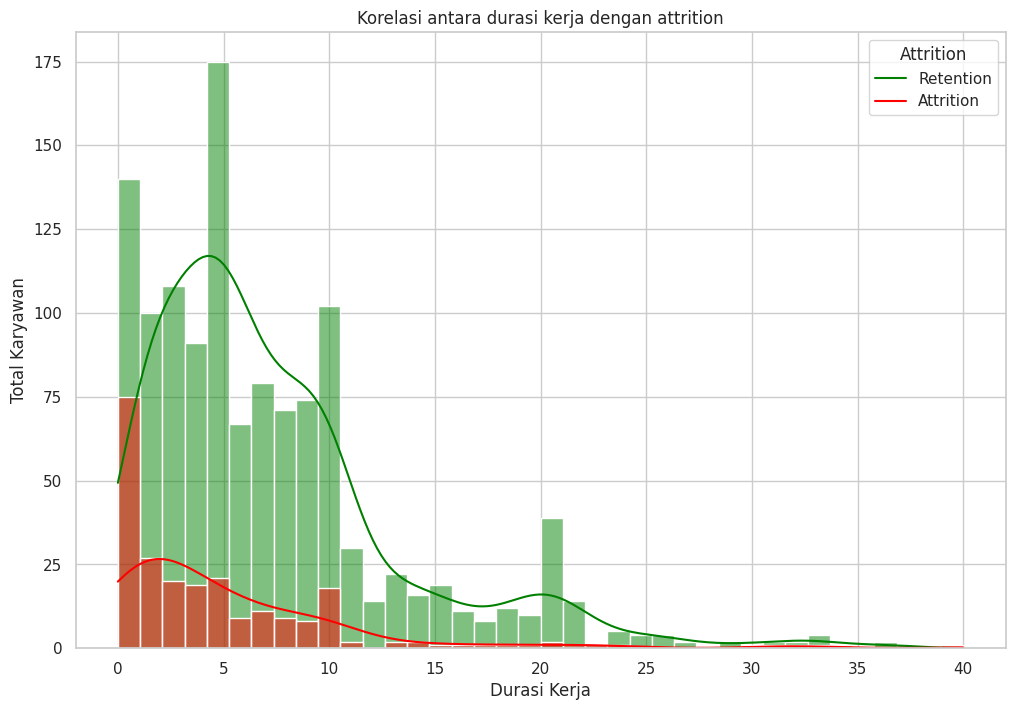

In [182]:
#Menentukan ukuran chart
plt.figure(figsize=(12, 8))

#Membuat chart
sns.histplot(data=data_final, x='YearsAtCompany', hue='Attrition', kde=True, palette={'Yes': 'red', 'No': 'green'})

#Merubah nama chart
plt.title('Korelasi antara durasi kerja dengan attrition')

#Menentukan nama axis x
plt.xlabel('Durasi Kerja')
#Menentukan nama axis y
plt.ylabel('Total Karyawan')

#Merubah label value
plt.legend(title='Attrition', labels=['Retention', 'Attrition'])

#Menampilkan chart
plt.show()

### **Insight**

Dari graph di dapatkan bahwa karyawan akan cendrung mengundurkan diri ketika masa kerja 0-5 tahun dengan peak adalah di 0-2 tahun pertama, sehingga pada masa awal ini di butuhkan perhatian khusus dari perusahaan. Sedangkan semakin lama durasi kerja karyawan di perusahaan karyawan akan semakin loyal dan sedikit kemungkinan akan mengundurkan diri.
Sehingga perusahaan perlu melakukan beragai kebijakan untuk menjaga engagment karyawan dengan masa durasi kerja < 2 tahun

## **Apakah ada pengaruh terhadap persentasi kenaikan gaji dengan attration karyawan?**



### **Grafik**

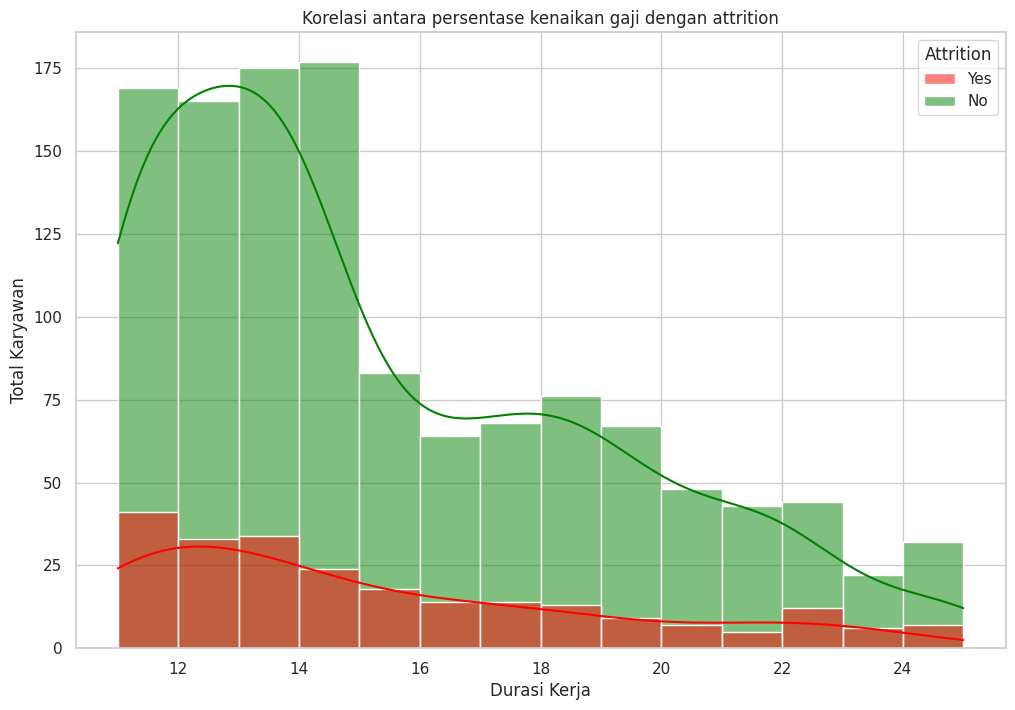

In [184]:
#Menentukan ukuran chart
plt.figure(figsize=(12, 8))

#Membuat chart
sns.histplot(data=data_final, x='PercentSalaryHike', hue='Attrition', kde=True, palette={'Yes': 'red', 'No': 'green'})

#Mengubah nama chart
plt.title('Korelasi antara persentase kenaikan gaji dengan attrition')

#Menentukan nama axis x
plt.xlabel('Durasi Kerja')
#Menentukan nama axis y
plt.ylabel('Total Karyawan')

#Menampilkan chart
plt.show()

### **Insight**

Berdasarkan analisis persentase kenaikan gaji dapat di lihat bahwa persentase dengan angka 10-16 persen cenderung membuat karyawan mengundurkan diri.
Sedangkan persentase kenaikan dengan range 20-24 adalah range paling aman untuk mempertahankan karyawan.
Sehingga perusahaan di sarankan untuk mempertimbangkan untuk menyesuaikan persentase kenaikan gaji ketika periode kenaikan gaji terjadi sesuai dengan data yang terlampir.

## **Berapa range penghasilan bulanan dari karyawan yang mengundurkan diri?**

### **Grafik**

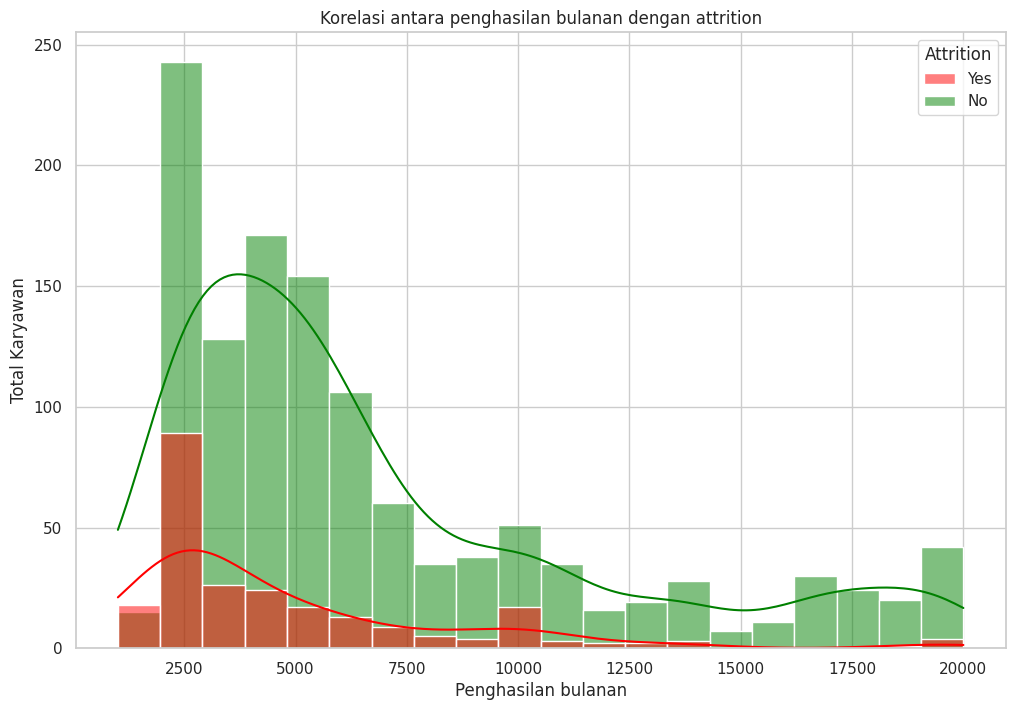

In [183]:
#Menentukan ukuran chart
plt.figure(figsize=(12, 8))

#Membuat chart
sns.histplot(data=data_final, x='MonthlyIncome', hue='Attrition', kde=True, palette={'Yes': 'red', 'No': 'green'})

#Menentukan nama chart
plt.title('Korelasi antara penghasilan bulanan dengan attrition')

#Menentukan nama axis x
plt.xlabel('Penghasilan bulanan')
#Menentukan nama axis y
plt.ylabel('Total Karyawan')

#Menampilkan chart
plt.show()

### **Insight**

Berdasarkan grafik bahwa karyawan dengan penghasil < 5000 cenderung mengajukan pengunduran diri, terutama karyawan dengan penghasilan bulanan sekitar 2500. HR perlu melakukan peninjauan penghasilan karyawan dengan range < 5000 dan menentukan kebijakan lain misal seperti penyesuaian range gaji atau reward lain yang dapat membuat karyawan dengan range pengasilan tersebut bertahan di perusahaan

# **Pengambilan Kesimpulan**

Berdasarkan analisis dapat di ambil kesimpulan sebagai berikut :

1. Persentase attrition saat ini adalah sebesar 16.12%, sehingga target yang di set untuk di capai sudah sesuai
2. Sehingga Perusahaan perlu melakukan beberapa kebijakan untuk mengurangi persentase attration karyawan dengan memperhatikan hal-hal berikut :
    * Masa kerja, perusahaan perlu mengutamakan untuk memperhatikan karyawan yang baru saja bergabung dengan perusahaan terutama pada durasi 0-2 tahun dengan melakukan banyak kebijakan-kebijakan, dan program  yang dapat meningkatkan engagment dan loyalitas kepada perusahaan.
    * Berdasarkan departemen, sales menjadi departemen dengan attrition tertinggi sebanyak 20.6%, di susul oleh Human resource sebanyak 19.0%, sehingga 2 departemen ini harus menjadi pantauan utama oleh perushaan untuk menurunkan persentase attrition nya
3. Hal-hal yang bisa di lakukan oleh perusahaan adalah :
    *   Meningkatkan Job Satisfication, Perusahaan perlu melakukan beberapa kebijakan untuk meningkatkan job satisfication, seperti pembagian job description yang jelas dan sejenisnya, hal ini perlu juga di diskusikan dengan departemen dan manager
    *   Memperhatikan Pembagian Lembur Karyawan, Perusahaan terutama departemen atau manager perlu memperhatikan kecendrungan lembur terhadap beberapa karyawan, hal ini bisa di lakukan diskusi dengan manager dari departemen nya untuk mengurangi atau mendistribusikan lembur dengan merata, mengatur pekerjaan dengan baik agar tidak perlu lembur atau memperhatikan kebutuhan manpower tambahan jika di perlukan.
    * Meninjau Persentase Kenaikan Gaji, Perusahaan disarankan menghindari persentase kenaikan gaji dengan range 12-16%, berdasarkan data persentase kenaikan gaji yang disarankan adalah >20%  
    * Meninjau Penghasilan bulanan, Karyawan dengan penghasilan kurang dari 5000 harus menjadi perhatian oleh perusahaan terutama karyawan dengan gaji sekitar 2500 perlu di lakukan peninjauan kembali mengenai total penghasilan setiap bulan nya

